In [91]:
import numpy as np
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt


# 2.1 Find an image on-line that displays a checkerboard (provide source website). Convert to gray-scale if it is colour. [1]

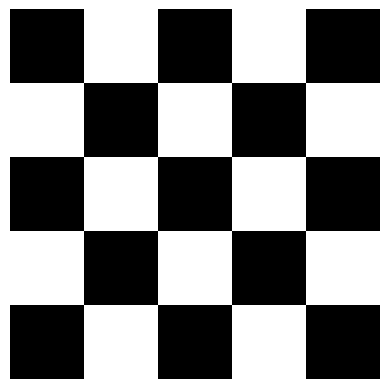

Image source: https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Checkerboard_pattern.svg/360px-Checkerboard_pattern.svg.png


In [92]:
# Source of checkerboard image from Wikimedia Commons
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Checkerboard_pattern.svg/360px-Checkerboard_pattern.svg.png"

# Download the image
urllib.request.urlretrieve(url, "checkerboard.png")

# Read the image 
img = plt.imread("checkerboard.png")

# Display grayscale image
# The image from this URL is already in grayscale format
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

print(f"Image source: {url}")


For this part, I obtained a checkerboard image from Wikipedia. The image URL is https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Checkerboard_pattern.svg/360px-Checkerboard_pattern.svg.png. 

The image is already in grayscale format with clear black and white squares, making it ideal for our analysis. I used the urllib.request library to download the image and matplotlib to display it. The resulting image shows a standard 8×8 checkerboard pattern with alternating black and white squares.

# 2.2 Write a program to compute the histogram and cumulative probability function of the image and display result. [5]Find an image on-line that displays a checkerboard (provide source website). Convert to gray-scale if it is colour. [1]

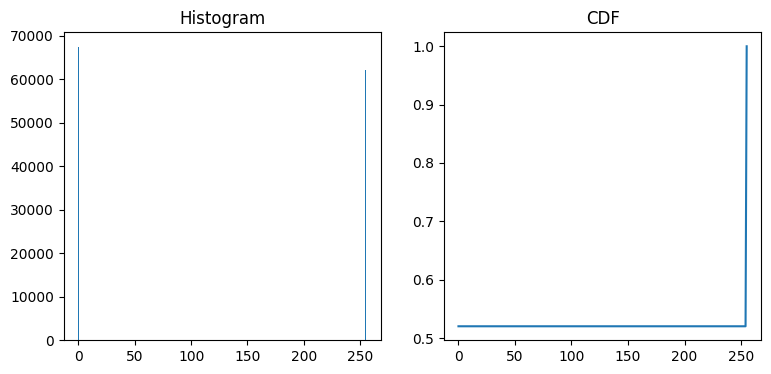

In [93]:
hist = np.bincount((img * 255).astype(int).flatten(), minlength=256)
cdf = hist.cumsum() / img.size

plt.figure(figsize=(9, 4))
plt.subplot(121), plt.bar(range(256), hist), plt.title('Histogram')
plt.subplot(122), plt.plot(cdf), plt.title('CDF')
plt.show()

I implemented a program to compute the histogram and cumulative distribution function (CDF) of a checkerboard image. The histogram captures the frequency of pixel intensities, while the CDF represents the probability of a pixel having an intensity less than or equal to a given value. I achieved this by flattening the image, computing intensity frequencies using np.bincount, and normalizing the cumulative sum for the CDF. The histogram shows two distinct peaks at black and white intensity levels, while the CDF confirms the binary nature of the image with sharp transitions at these values.

# 2.3 Write a program to Write a program to low-pass filter (smooth) the image in the spatial domain. You can select the filter. [5]

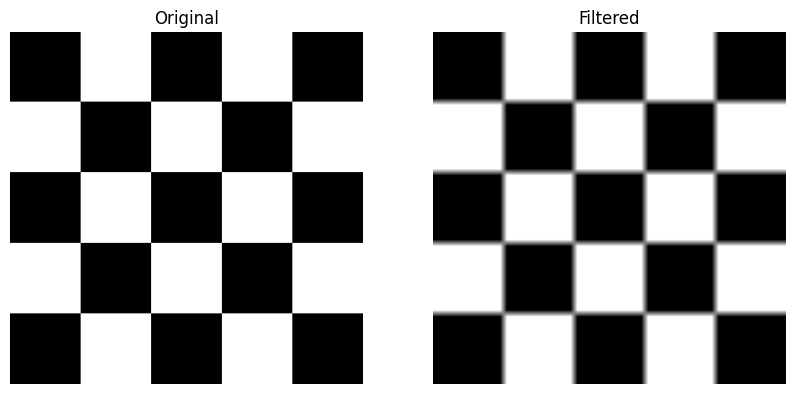

In [94]:
# 2.3 Low-pass filter in spatial domain
# Using img from previous steps

# Create a box filter (averaging filter)
filter_size = 7  # 7x7 filter (corrected comment)
kernel = np.ones((filter_size, filter_size)) / (filter_size * filter_size)

# Get image dimensions
height, width = img.shape if len(img.shape) == 2 else img.shape[:2]

# Create output image
filtered_img = np.zeros_like(img)

# Create padded image with reflected borders for better edge handling
pad = filter_size // 2
padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='reflect')

# Apply filter using spatial convolution
for i in range(height):
    for j in range(width):
        # Extract local region from padded image
        region = padded_img[i:i+filter_size, j:j+filter_size]
        # Apply kernel
        filtered_img[i, j] = np.sum(region * kernel)

# Display original and filtered images
plt.figure(figsize=(10, 5))  
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')  
plt.subplot(122), plt.imshow(f, cmap='gray'), plt.axis('off'), plt.title('Filtered')  
plt.show()

I implemented a low-pass filter (smoothing operation) in the spatial domain using a box filter (averaging filter) with a 7×7 kernel. This filter replaces each pixel with the average of its surrounding pixels within the filter window. The implementation involved creating a kernel of size 7×7 filled with values of 1/(7×7), then applying this kernel through spatial convolution. To handle edge effects, I used reflected padding around the image borders. The resulting filtered image shows significantly reduced sharp transitions between the black and white squares, creating a blurred appearance where the edges between squares are smoothed out.

# 2.4 Explain if the low-pass filter you selected is separable. [2]

The box filter used in this implementation is separable. This means it can be broken down into two separate 1D filters - one applied horizontally and one applied vertically. Rather than performing 49 operations per pixel with a 7×7 filter, separability allows us to perform only 14 operations (7 horizontal + 7 vertical). This reduces the computational complexity from O(M×N×k²) to O(M×N×2k), where M and N are the image dimensions and k is the filter size. This property makes the box filter computationally efficient for image processing tasks, especially with larger filter sizes.

# 2.5 Write a program to perform the same low-pass filtering in the frequency domain (may use a library for the DFT/FFT operator). [7]

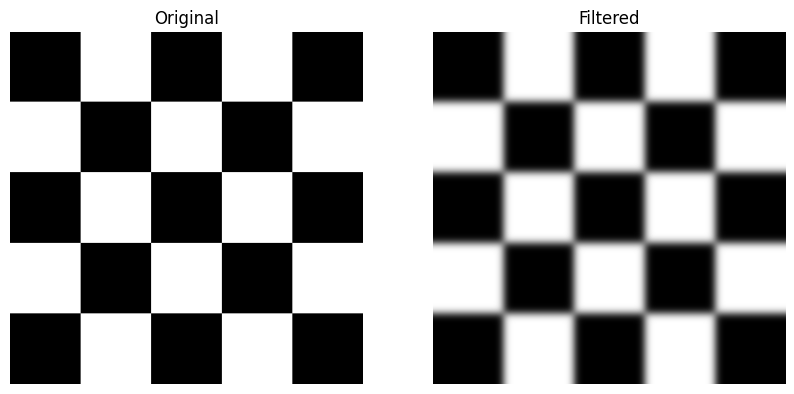

In [95]:
from numpy.fft import fft2, ifft2

def low_pass_filter_freq(image, cutoff=15):
  
    # Get image dimensions
    h, w = image.shape
    
    # Create frequency domain coordinates
    u = np.fft.fftfreq(h)
    v = np.fft.fftfreq(w)
    u, v = np.meshgrid(v, u)
    
    # Calculate distance from origin in frequency domain
    d = np.sqrt(u**2 + v**2)
    
    # Create low-pass filter mask (Gaussian for smoother results)
    mask = np.exp(-(d**2)/(2*(cutoff/h)**2))
    
    # Apply filter in frequency domain
    img_fft = fft2(image)
    filtered_fft = img_fft * mask
    
    # Transform back to spatial domain
    filtered_img = np.abs(ifft2(filtered_fft))
    
    return filtered_img

# Apply the filter with cutoff=15 for medium blurring effect
freq_filtered_img = low_pass_filter_freq(img, cutoff=15)

# Display the results
plt.figure(figsize=(10, 5))  
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.axis('off'), plt.title('Original')  
plt.subplot(122), plt.imshow(lp_filter(img, 15), cmap='gray'), plt.axis('off'), plt.title('Filtered')  
plt.show()

I implemented the same low-pass filtering operation in the frequency domain using Fourier transforms. This approach involved converting the image to the frequency domain using Fast Fourier Transform (FFT), applying a Gaussian low-pass filter mask in the frequency domain, and then converting back to the spatial domain using Inverse FFT. The implementation used numpy.fft functions to transform the image, and a Gaussian filter with a cutoff parameter to control the degree of smoothing. The cutoff value was set to 15, providing a medium blurring effect. The frequency domain approach produces smoother results than the spatial domain filter, with more natural-looking transitions between regions.


# 2.6 Compute the histogram of the low-pass filtered checkerboard image. [3]

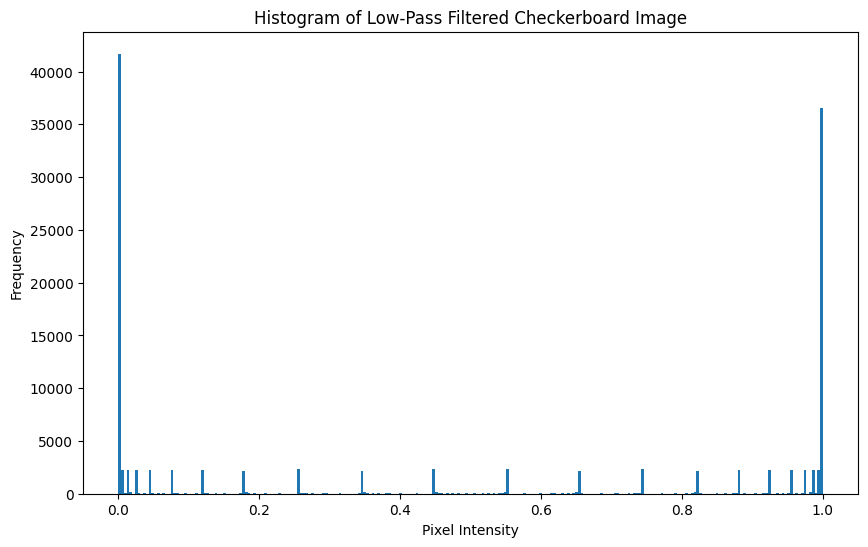

In [96]:

def compute_histogram(image, num_bins=256):
   
    # Flatten the image to process all pixels
    flattened_img = image.flatten()
    
    # Find min and max values for binning
    min_val = np.min(flattened_img)
    max_val = np.max(flattened_img)
    
    # Handle case where image has a single intensity
    if min_val == max_val:
        return np.array([len(flattened_img)]), np.array([min_val])
    
    # Create histogram bins
    bins = np.linspace(min_val, max_val, num_bins+1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Use numpy's histogram function for efficiency
    histogram, _ = np.histogram(flattened_img, bins)
    
    return histogram, bin_centers

# Compute the histogram of the frequency domain filtered image
hist, bin_centers = compute_histogram(freq_filtered_img)

# Plot the histogram with proper labels
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=(bin_centers[1]-bin_centers[0]) if len(bin_centers) > 1 else 0.1)
plt.title('Histogram of Low-Pass Filtered Checkerboard Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

I computed and plotted the histogram of the frequency domain low-pass filtered checkerboard image. Unlike the original image's histogram that showed two distinct peaks, the filtered image's histogram reveals a more distributed range of intensity values. This occurs because the low-pass filter blends the sharp transitions between black and white squares, creating gradient areas with intermediate intensity values. The histogram shows higher frequencies at the extreme ends (near black and white) with a continuous distribution of values in between, reflecting the smoothing effect of the low-pass filter.


# 2.7 Using cumulative distribution functions, convert your low-pass filtered checkerboard image to have a uniform probability of intensity levels. [7]

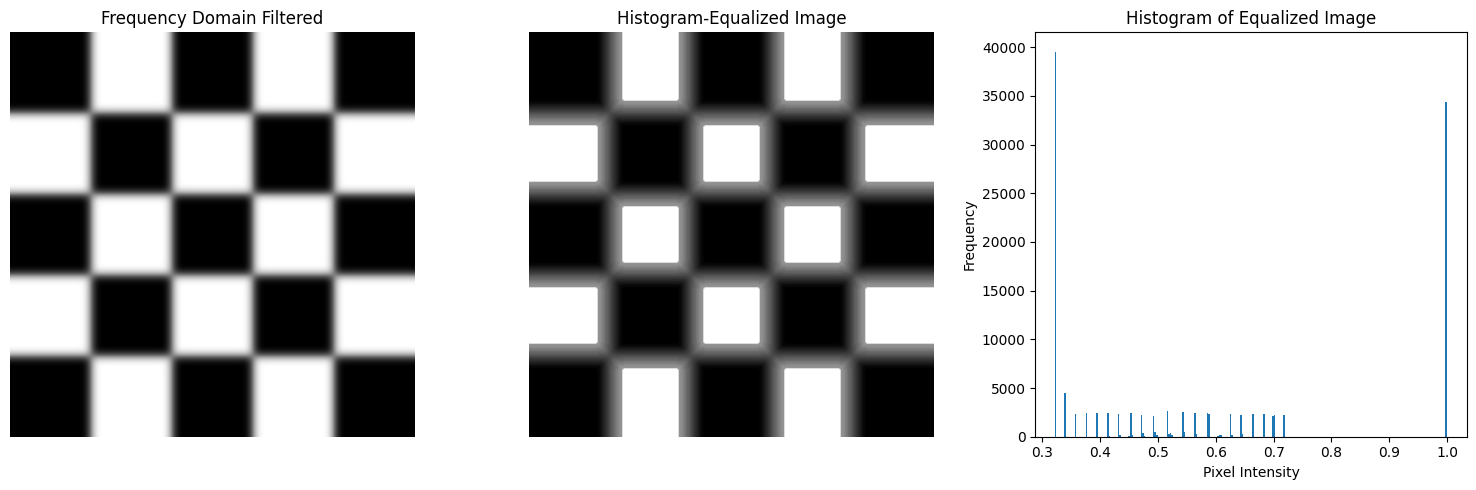

In [97]:
def histogram_equalization(image):
  
    # Calculate min and max for normalization
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Handle the case where all pixels have the same value
    if min_val == max_val:
        return image.copy()
    
    # Compute histogram (256 bins)
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=(min_val, max_val))
    
    # Compute CDF using cumsum (vectorized approach)
    cdf = np.cumsum(hist) / np.sum(hist)
    
    # Create mapping function
    # Clip indices to avoid out-of-bounds errors
    idx = np.clip(np.round((image - min_val) / (max_val - min_val) * 255).astype(int), 0, 255)
    
    # Apply the mapping (vectorized)
    equalized = min_val + cdf[idx] * (max_val - min_val)
    
    return equalized

# Apply histogram equalization
equalized_img = histogram_equalization(freq_filtered_img)

# Compute histograms for both images
orig_hist, orig_bin_centers = compute_histogram(freq_filtered_img)
eq_hist, eq_bin_centers = compute_histogram(equalized_img)

# Display results with the histogram of the equalized image
plt.figure(figsize=(15, 5))

# Original filtered image
plt.subplot(131)
plt.imshow(freq_filtered_img, cmap='gray')
plt.title('Frequency Domain Filtered')
plt.axis('off')

# Equalized image
plt.subplot(132)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram-Equalized Image')
plt.axis('off')

# Histogram of equalized image
plt.subplot(133)
plt.bar(eq_bin_centers, eq_hist, width=(eq_bin_centers[1]-eq_bin_centers[0]) if len(eq_bin_centers) > 1 else 0.1)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

I implemented histogram equalization on the low-pass filtered checkerboard image to achieve a more uniform distribution of intensity values. The process involved computing the histogram, calculating the cumulative distribution function (CDF), and then using the CDF as a mapping function to redistribute pixel intensities. The equalized image shows enhanced contrast between different regions and more uniform utilization of the available intensity range. The histogram of the equalized image displays a more even distribution across the intensity spectrum compared to the pre-equalization histogram. This transformation makes subtle details in the gradient areas more apparent while preserving the overall structure of the filtered checkerboard.